In [46]:
import random
a = random.randint(0, 100)
a

57

In [47]:
a*2

114

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [49]:
boston_dataset = datasets.load_boston()
x_full = boston_dataset.data
y = boston_dataset.target
print(x_full.shape)
print(y.shape)

(506, 13)
(506,)


In [50]:
print(boston_dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [51]:
selector = SelectKBest(f_regression, k=1)
selector.fit(x_full, y)
x = x_full[:, selector.get_support()]
print(x.shape)

(506, 1)


In [52]:
def plot_scatter( x, y , R=None):
    plt.scatter(x,y, s=32, marker='o', facecolors = 'white', color='black')
    if R is not None:
        plt.scatter(x, R, color = 'red', linewidth = 0.5)
    plt.show()

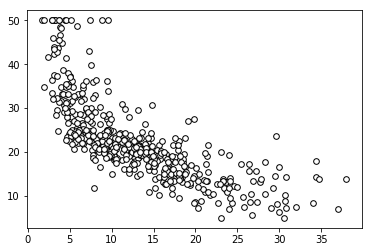

In [53]:
plot_scatter(x, y)

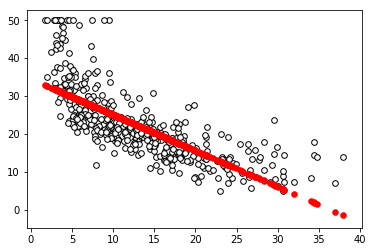

In [54]:
regressor = LinearRegression(normalize=True).fit(x,y)
plot_scatter(x,y, regressor.predict(x))

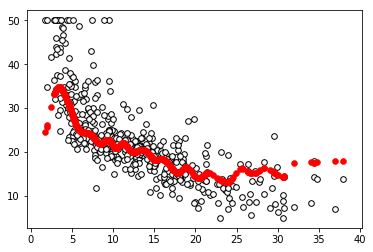

In [55]:
regressor = SVR().fit(x,y)
plot_scatter(x,y,regressor.predict(x))

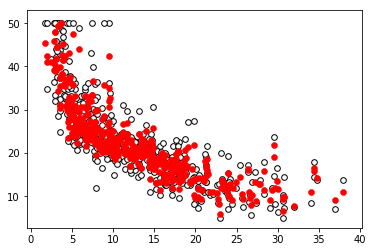

In [56]:
regressor = RandomForestRegressor().fit(x,y)
plot_scatter(x, y, regressor.predict(x))